In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

np.random.seed(0)

In [9]:
#practice 4-1
coin_data = np.array([0,1])
coin_data_log = np.random.choice(coin_data, 1000)
print('表が出る確率', len(coin_data_log[coin_data_log == 0])/1000)
print('裏が出る確率',len(coin_data_log[coin_data_log == 1])/1000)

表が出る確率 0.503
裏が出る確率 0.497


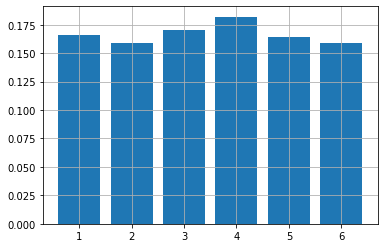

In [24]:
#一様分布
dice_data = np.arange(1,7)
calc_steps = 1000
dice_rolls = np.random.choice(dice_data, calc_steps)

prob_data = np.array([])
for i in range(1,7):
    p = len(dice_rolls[dice_rolls == i])/calc_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls == i])/calc_steps)
    
plt.bar(dice_data, prob_data)
plt.grid(True)

0 が出る確率 0.625
1 が出る確率 0.375


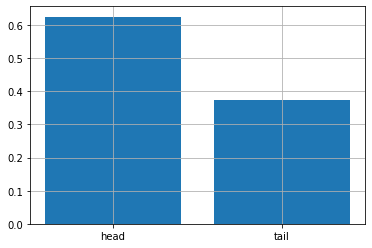

In [25]:
#ベルヌーイ分布
#結果が２種類しかない試行をベルヌーイ試行という．　一回のベルヌーイ試行において各事象が生じる確率をベルヌーイ分布と呼ぶ
prob_be_data = np.array([])
coin_data = np.array([0,0,0,0,0,1,1,1])

for i in np.unique(coin_data):
    p = len(coin_data[coin_data == i])/len(coin_data)
    print(i, 'が出る確率', p)
    prob_be_data = np.append(prob_be_data, p)
    
plt.bar([0,1], prob_be_data, align='center')
plt.xticks([0,1], ['head', 'tail'])
plt.grid(True)

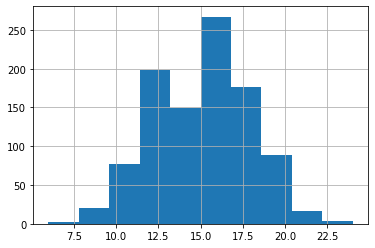

In [26]:
#二項分布
#ベルヌーイ試行をn回繰り返したときの，　確率pで生じる事象が発生する回数
np.random.seed(0)
#試行回数，　確率，　サンプル数
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

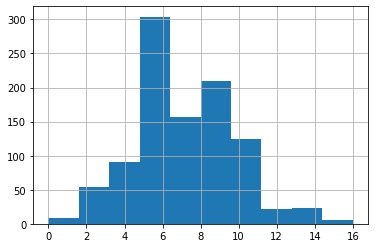

In [32]:
#ポアソン分布
#最初のパラメータは，　ある区間で事象が発生すると見込まれる数
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

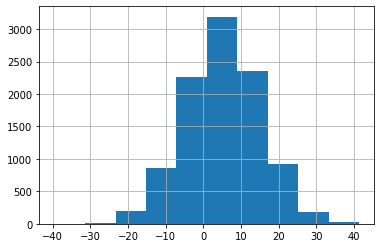

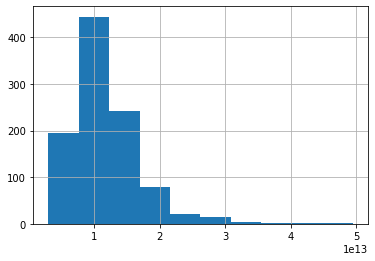

In [40]:
#正規分布と対数正規分布
#平均，標準偏差，サンプル数
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)
plt.show()

x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)
plt.show()

In [46]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')

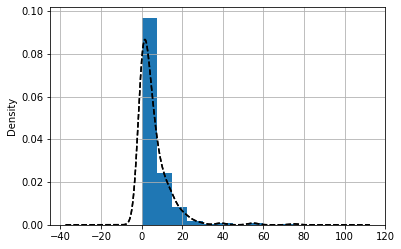

In [50]:
student_data_math.absences.plot(kind = 'kde', style = 'k--')

import requests
import zipfile
from io import StringIO
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# データを読み込む
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# カーネル密度関数
student_data_math.absences.plot(kind='kde', style='k--')

# 単純なヒストグラム、density=Trueにすることで、確率で表示
student_data_math.absences.hist(density=True)
plt.grid(True)

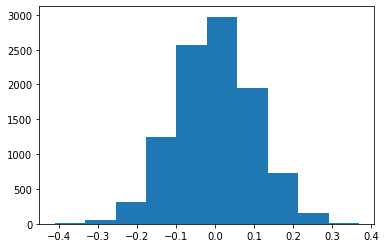

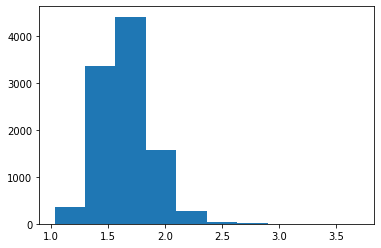

In [58]:
#practice 4-4
x = [np.random.normal(0, 1, 100).mean() for _ in range(10000)]
plt.hist(x)
plt.show()

#practice 4-5
x = [np.random.lognormal(0, 1, 100).mean() for _ in range(10000)]
plt.hist(x)
plt.show()


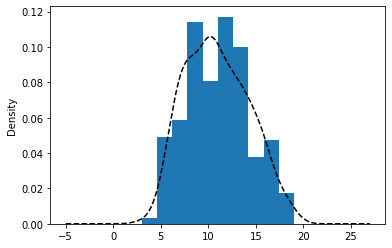

In [62]:
student_data_math.G1.plot(kind = 'kde', style = 'k--')

plt.hist(student_data_math.G1, density=True)
plt.show()

In [68]:
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

x, y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2,))

pos[:, :, 0] = x
pos[:, :, 1] = y

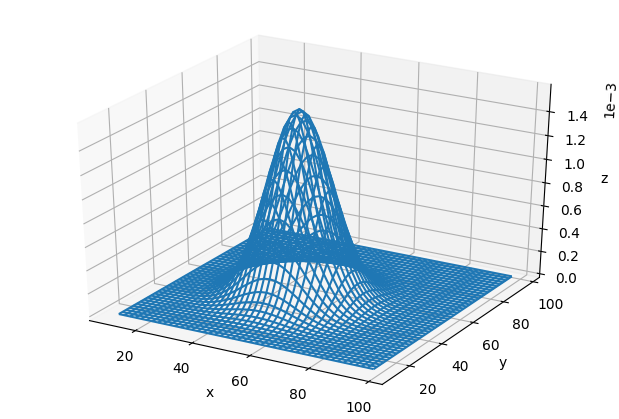

In [75]:
#xとyの平均が[50, 50], xとyの共分散が[[100,0][0,100]]
rv = multivariate_normal([50, 50], [[100,0], [0,100]])
z = rv.pdf(pos)

fig = plt.figure(dpi=100)
ax = Axes3D(fig)
ax.plot_wireframe(x,y,z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.ticklabel_format(style='sci', axis='z', scilimits = (0,0))

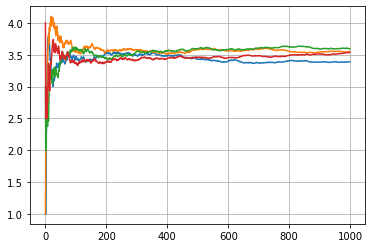

In [81]:
#大数の法則
calc_times = 1000
sample_array = np.arange(1,7)
number_cnt = np.arange(1, calc_times + 1)

for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p/number_cnt)
    plt.grid(True)

In [86]:
#中心極限定理
def function_central_theory(N):
    sample_array = np.arange(1,7)
    number_cnt = np.arange(1, N+1)*1.0
    
    mean_array = np.array([])
    
    for i in range(1000):
        cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1]/N)
        
    plt.hist(mean_array)
    plt.grid(True)

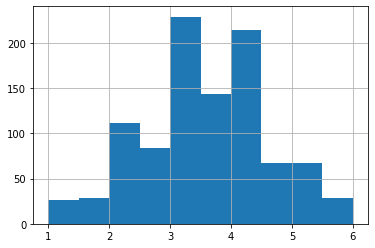

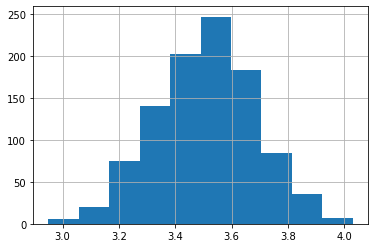

In [89]:
function_central_theory(3)
plt.show()
function_central_theory(100)
plt.show()

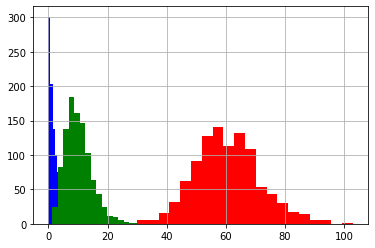

In [91]:
#カイ二乗分布
for df, c in zip([2,10,60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)
    plt.grid(True)

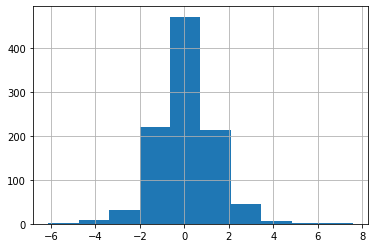

In [92]:
#t分布
x = np.random.standard_t(5,1000)
plt.hist(x)
plt.grid(True)

(-2.500, 25.000)

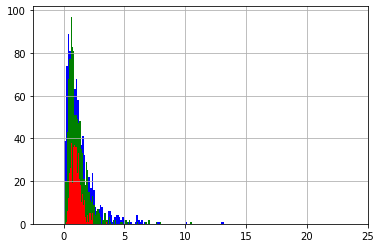

In [96]:
#F分布
for df, c in zip([(6,7), (10,10), (20,25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)
    plt.grid(True)
plt.xlim([-2.5, 25])

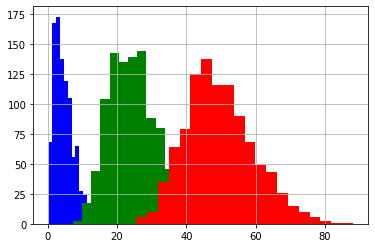

In [98]:
#practice 4-7
for df, c in zip([5,25,50], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)
    plt.grid(True)

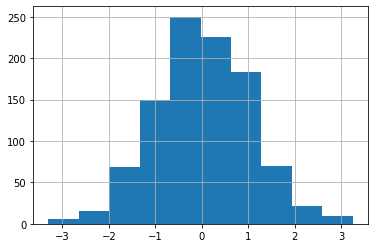

In [99]:
#practice 4-8
x = np.random.standard_t(100,1000)
plt.hist(x)
plt.grid(True)

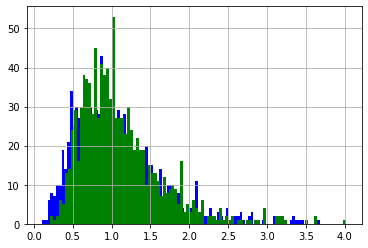

In [117]:
#practice 4-9
for df, c in zip([(10,30), (20,25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)
    plt.grid(True)